# **I. Perkenalan**

***
Non - Graded Challenge Clustering

Nama  : Catherine Kezia Wijaya
Batch : RMT-037

File ipynb ini berisikan pembuatan machine learning model yang dapat memprediksi insurance cost seseorang.
***

## Pendahuluan

### Latar Belakang

### Objective
penjelasan model dan metrics

# **IV. Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from feature_engine.outliers import Winsorizer
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
import json
import pickle

# **V. Data Loading**

In [4]:
df_ori = pd.read_csv('humanitarian-aid.csv')
df = df_ori.copy()
df

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.columns

Index(['country', 'child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'total_fertility', 'gdpp'],
      dtype='object')

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
#Define which one is numerical and categorical

num_cols= df.select_dtypes(exclude=['object']).columns
cat_cols= df['country']

num_cols

Index(['child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'total_fertility', 'gdpp'],
      dtype='object')

In [10]:
df[num_cols].describe()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# **VI. Exploratory Data Analysis (EDA)**

Lebih banyak variasi

In [11]:
#See correlation with pearson between all variables

df[num_cols].corr()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
child_mortality,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expectancy,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fertility,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


Text(0.5, 1.0, 'child_mortality vs total_fertility')

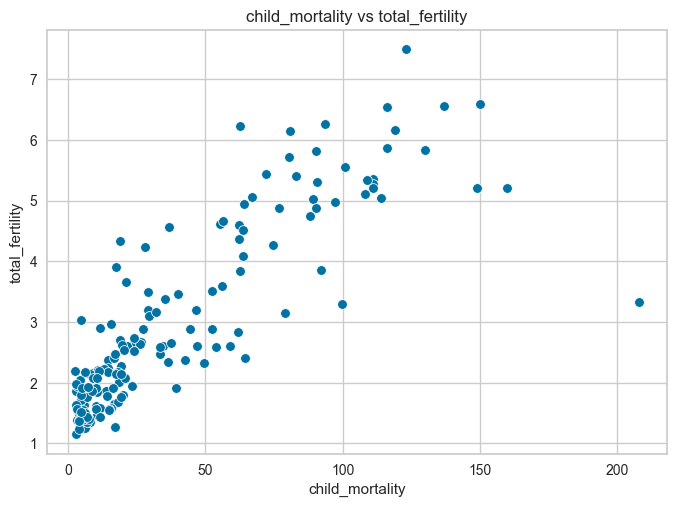

In [ ]:
#hubungan income dengan child mortality

sns.scatterplot(data=df,x='child_mortality', y='total_fertility')
plt.title('child_mortality vs total_fertility')

Text(0.5, 1.0, 'exports vs imports')

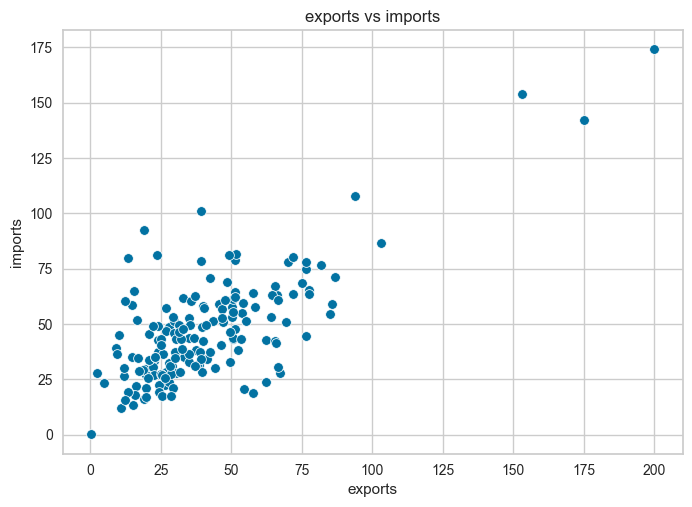

In [13]:
#hubungan health dengan child mortality

sns.scatterplot(data=df,x='exports', y='imports')
plt.title('exports vs imports')

Text(0.5, 1.0, 'life_expectancy vs income')

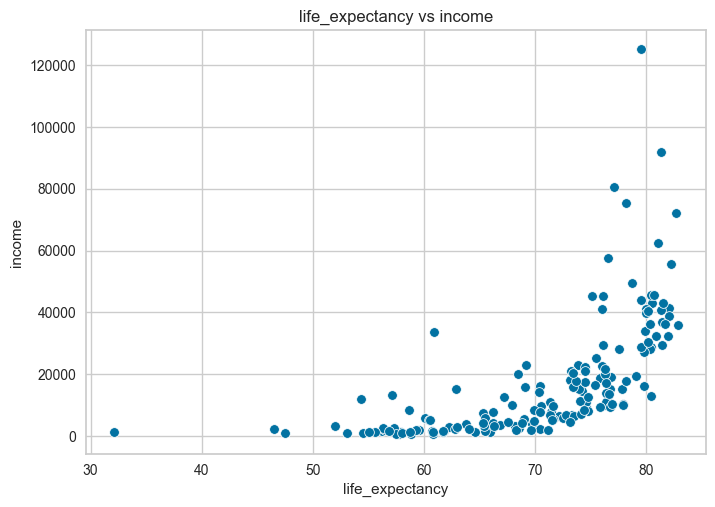

In [14]:
#hubungan income dengan life expectancy

sns.scatterplot(data=df,x='life_expectancy', y='income')
plt.title('life_expectancy vs income')

Text(0.5, 1.0, 'gdpp vs income')

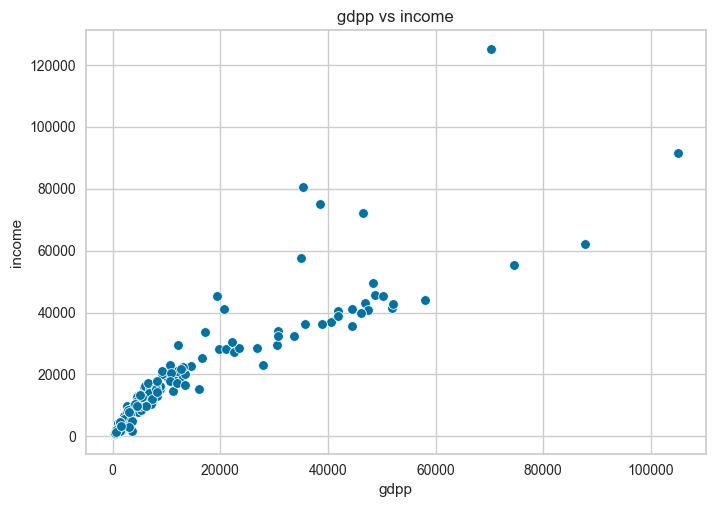

In [15]:
#hubungan gdpp dengan income

sns.scatterplot(data=df,x='gdpp', y='income')
plt.title('gdpp vs income')

Text(0.5, 1.0, 'gdpp vs life_expectancy')

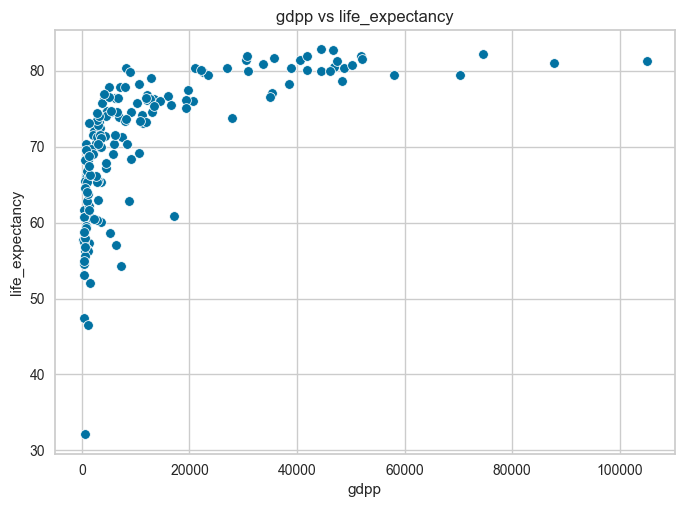

In [16]:
#hubungan gdpp dengan life expenctancy

sns.scatterplot(data=df,x='gdpp', y='life_expectancy')
plt.title('gdpp vs life_expectancy')

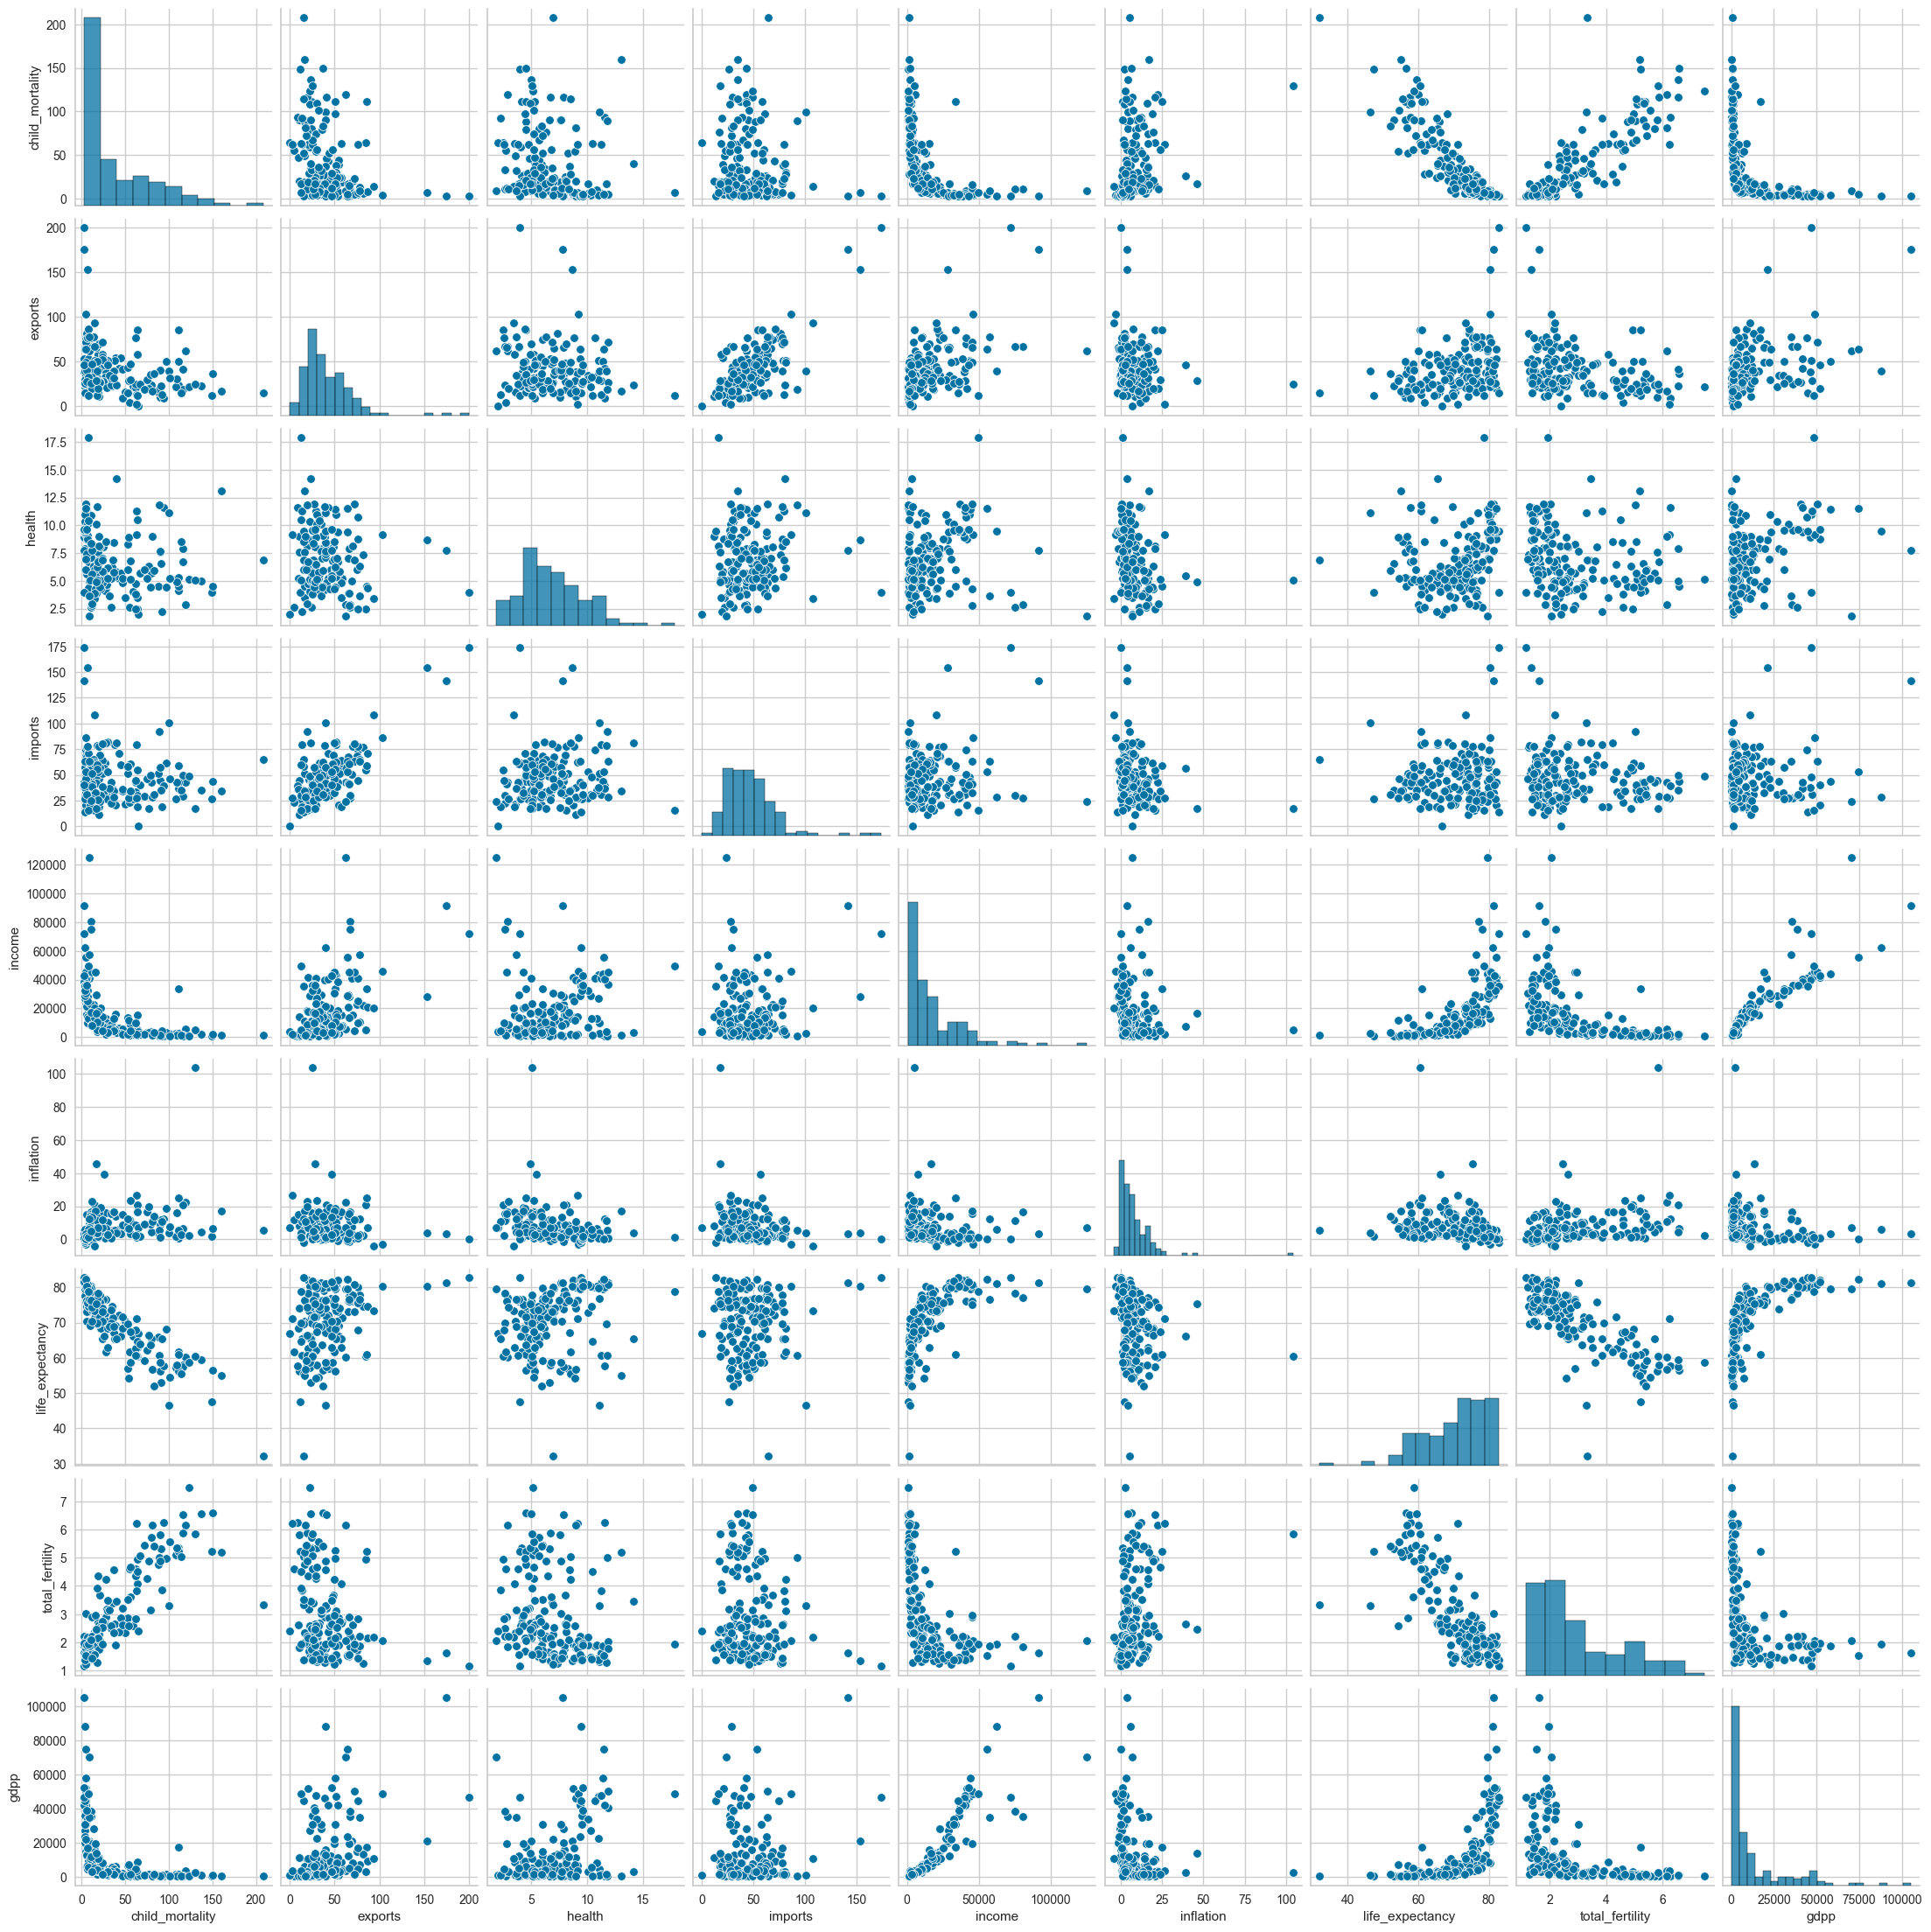

In [17]:
#Pairplot untuk numerical kolom
sns.pairplot(df[num_cols])

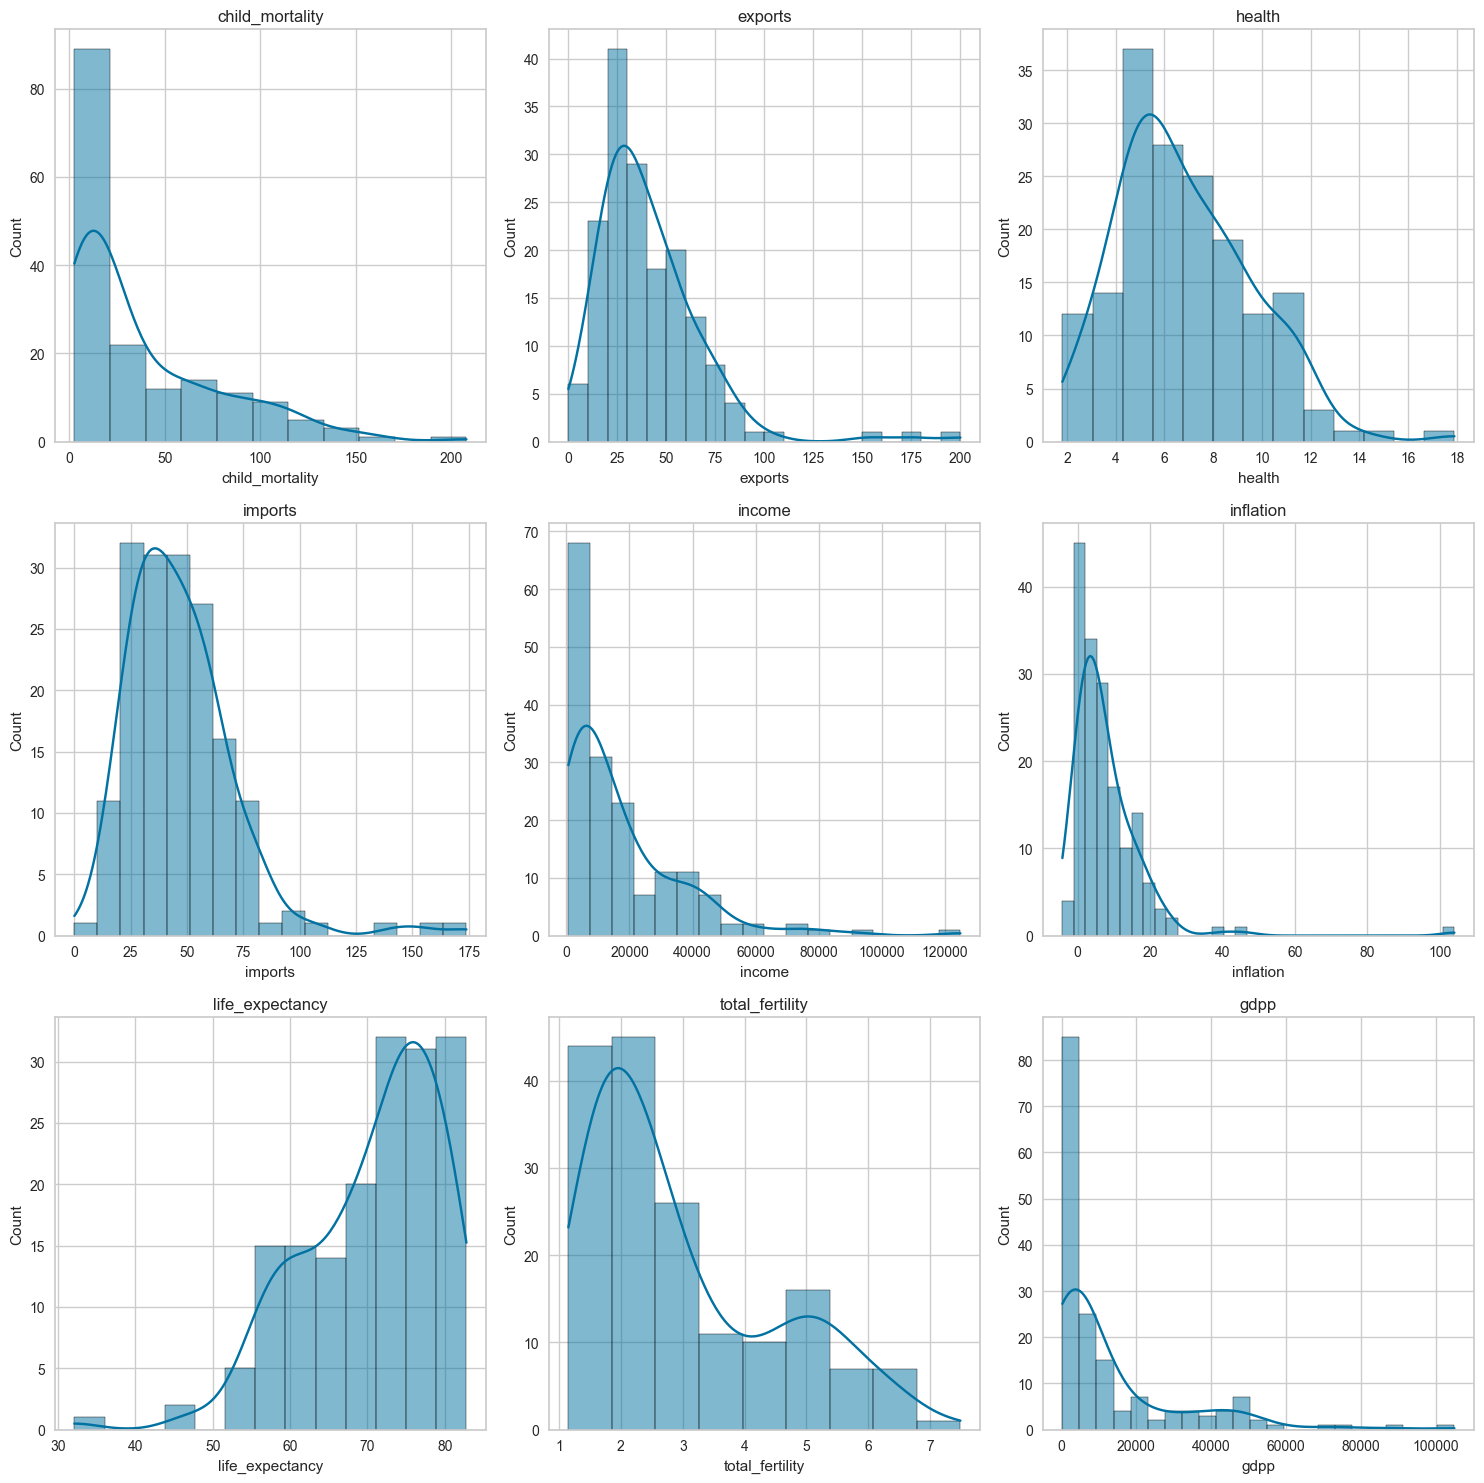

In [18]:
#Melihat distribusi tiap kolom

# buat figure dan axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms with KDE
for i, column in enumerate(num_cols):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)

# Display plot
plt.tight_layout()
plt.show()

Terlihat semua data bersifat skewed

# VII - Feature Engineering

In [19]:
#Hanya diguunakan kolom numerical

X = df[num_cols]

print(X.shape)

(167, 9)


## Handling Outlier

In [20]:
df[num_cols].skew()

child_mortality    1.450774
exports            2.445824
health             0.705746
imports            1.905276
income             2.231480
inflation          5.154049
life_expectancy   -0.970996
total_fertility    0.967092
gdpp               2.218051
dtype: float64

In [21]:
winsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=1.5,
                          variables=['health','total_fertility', 'life_expectancy'])

winsoriserextreme = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=3,
                          variables=['child_mortality', 'exports', 'imports', 'income', 'inflation', 'gdpp'])

winsoriser.fit(X)
winsoriserextreme.fit(X)

X = winsoriser.transform(X)
X = winsoriserextreme.transform(X)

## Handling Missing Value

In [22]:
X.isnull().sum()

child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
total_fertility    0
gdpp               0
dtype: int64

## Scaling

In [23]:
X.skew()

child_mortality    1.450774
exports            1.370623
health             0.480173
imports            1.515298
income             1.648947
inflation          1.605612
life_expectancy   -0.660644
total_fertility    0.941084
gdpp               1.500920
dtype: float64

Pakai MinMax

In [24]:
# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## PCA

In [25]:
pca = PCA()
pca.fit(X_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

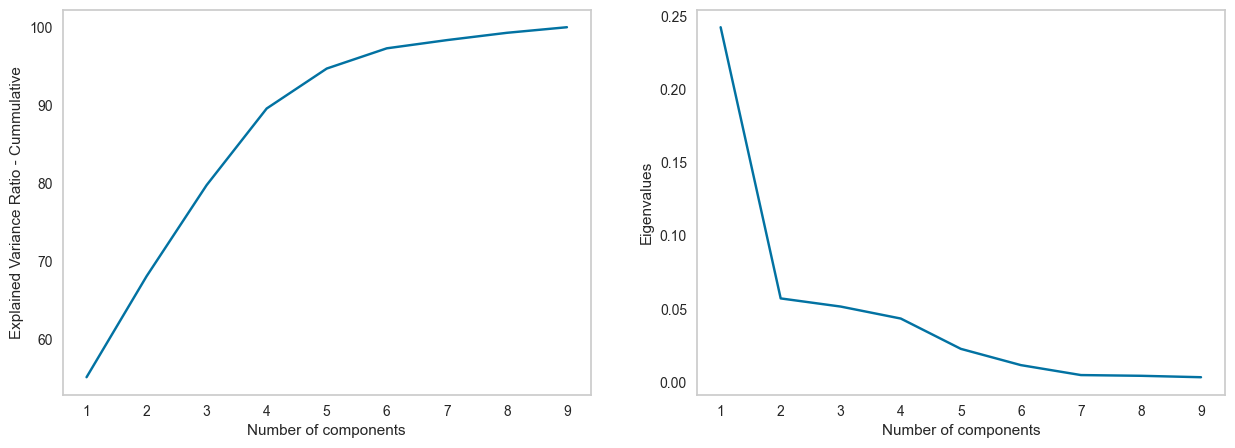

In [26]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 10), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 10), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [27]:
# Check the number of features if we want to retain 75 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.75) + 1
num_features

np.int64(3)

In [28]:
# Let's train the model with reducing to 2 component

pca = PCA(n_components=3)
pca.fit(X_scaled)

X_scaled_pca = pca.transform(X_scaled)

# **VIII. Model Definition**

menggunakan k-means cocok untuk data numerikal. hyperparameter k ditentukan dengan elbow dan silhouette.

# **XI. Model Training**

## Elbow Method

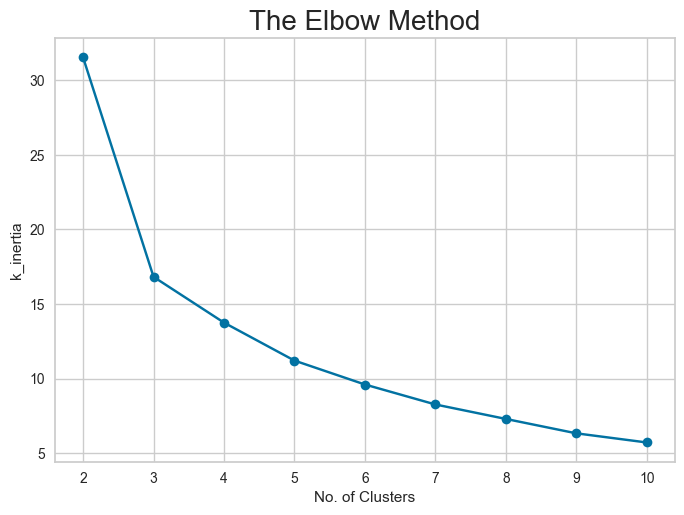

In [29]:
k_inertia = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(X_scaled_pca)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

nilai k = 3

## Silhouette Score

In [30]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.39130139014050175
For n_clusters = 3 The average silhouette_score is : 0.46583991865008917
For n_clusters = 4 The average silhouette_score is : 0.4679858113435867
For n_clusters = 5 The average silhouette_score is : 0.364384402847047


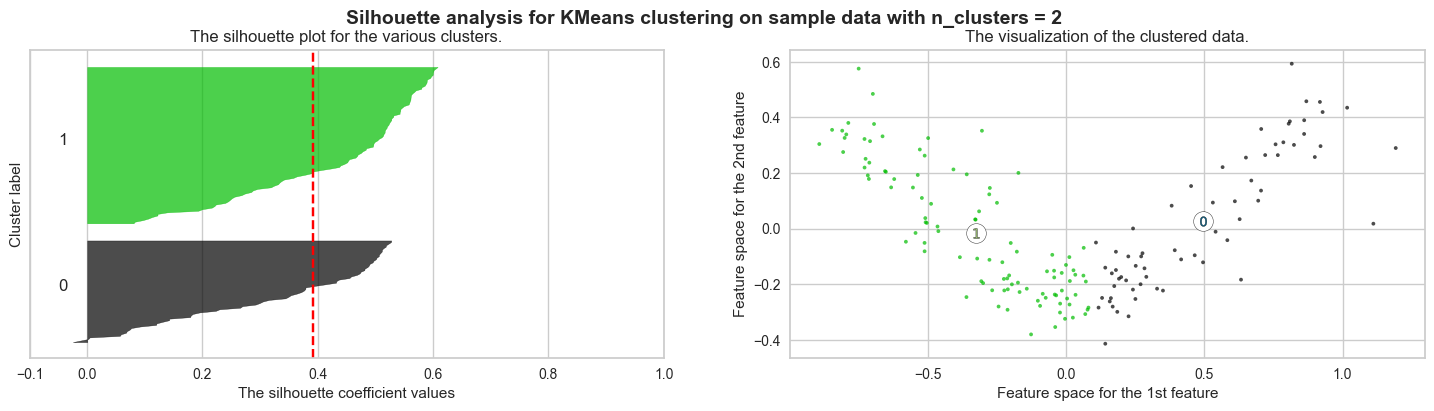

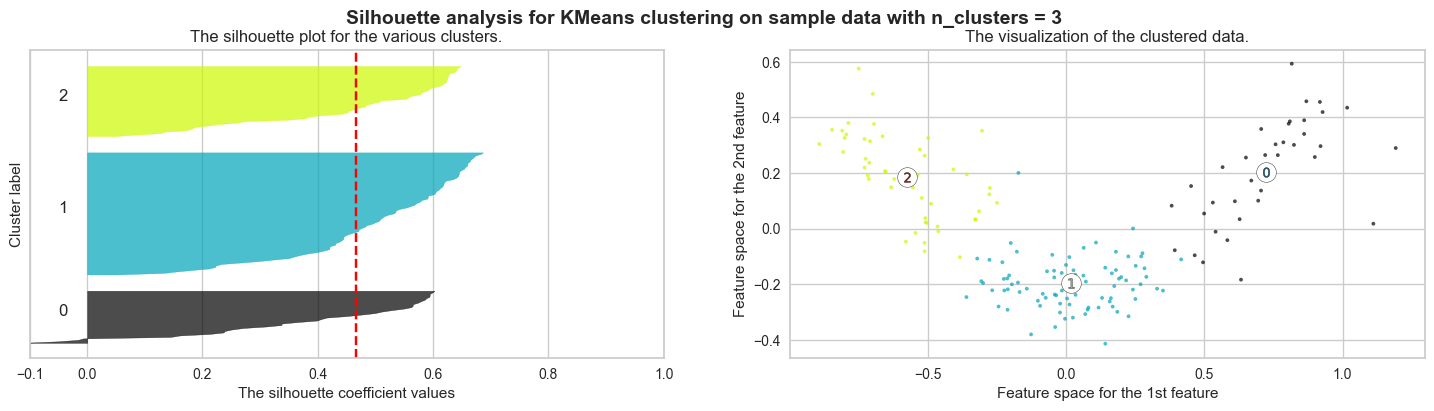

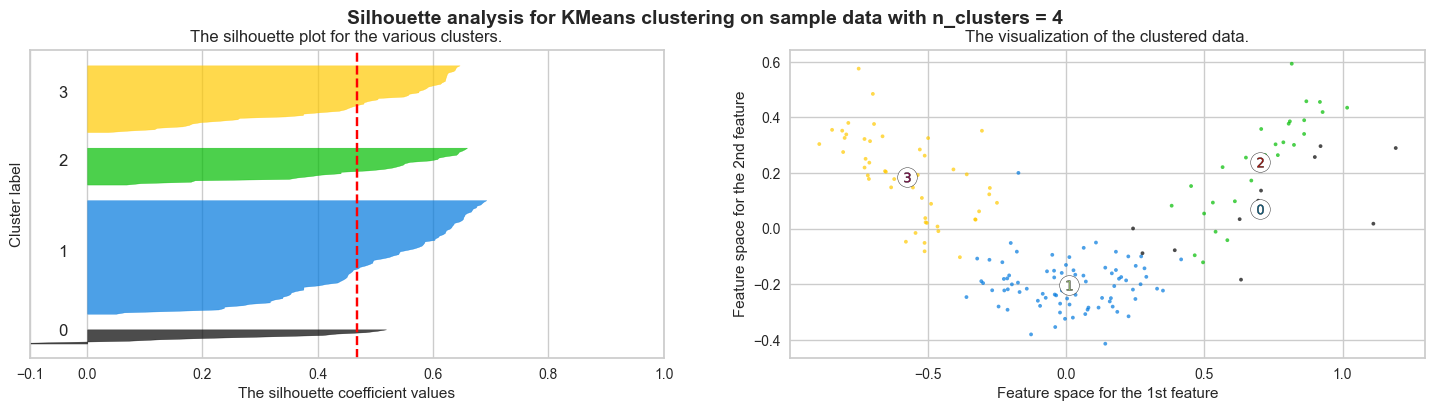

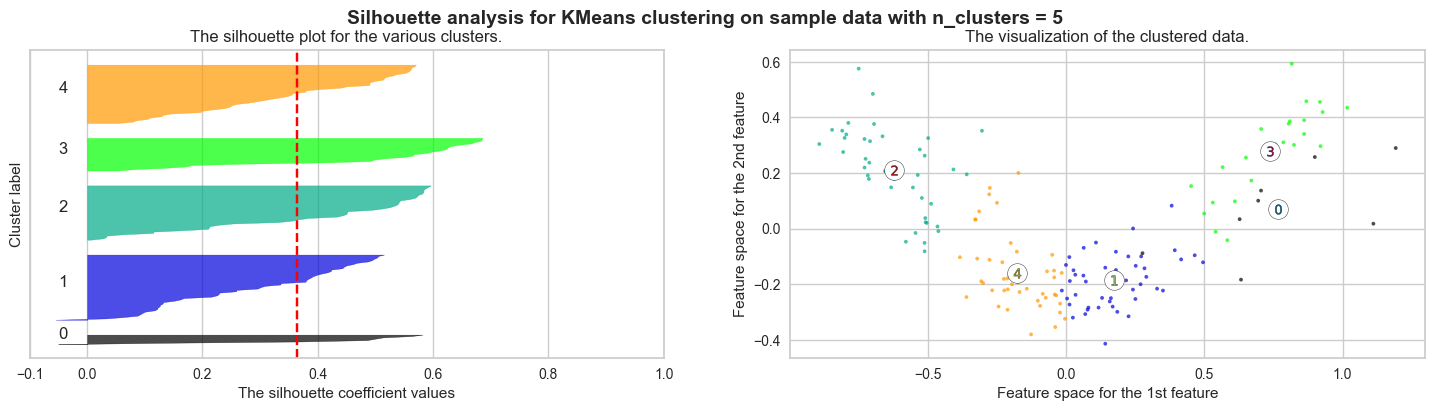

In [31]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, 6), X_scaled_pca, 3)

## Optional

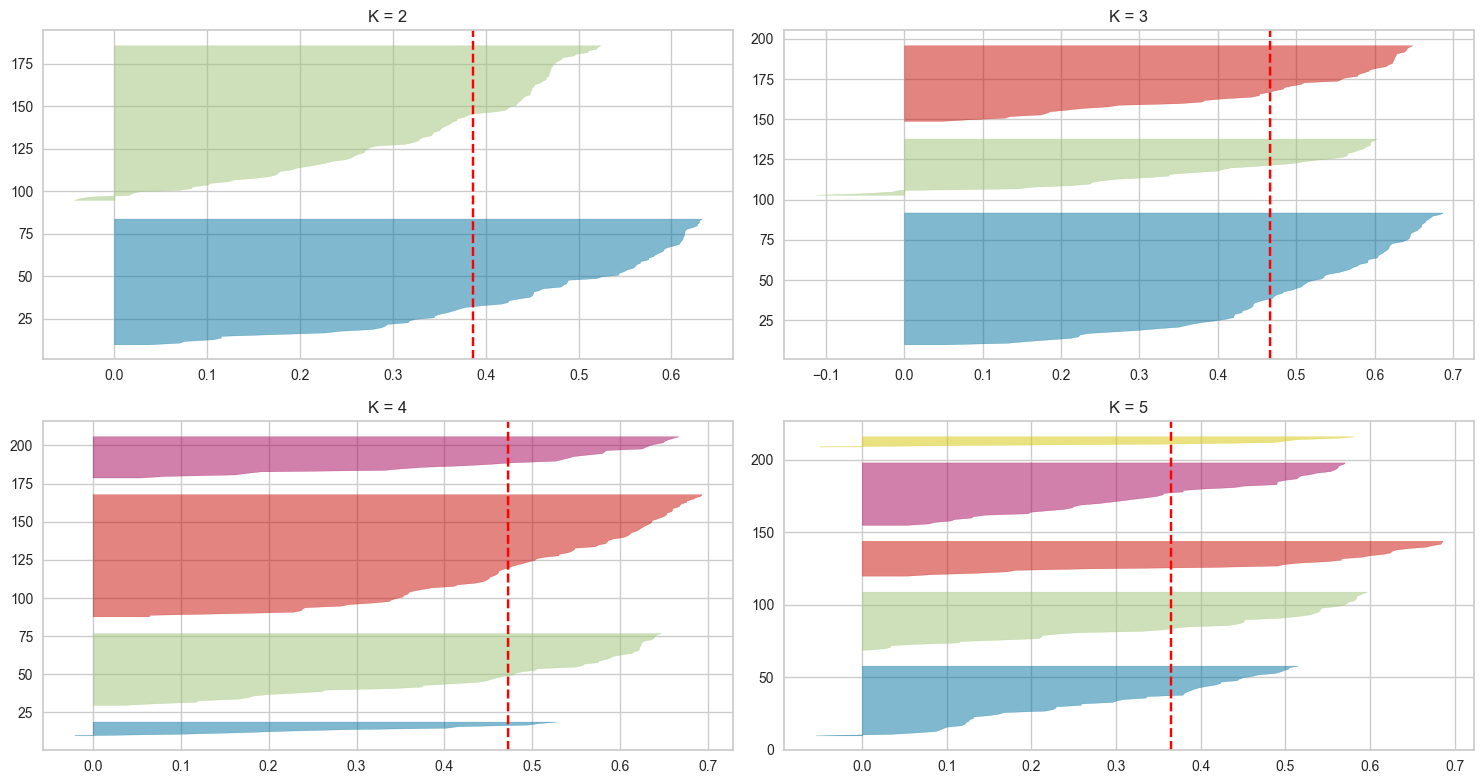

In [32]:
#Silhoutte Plot Analysis

# Set up subplots
#diatur mau dicoba berapa cluster disini
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(X_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

## Final clusters, k = 3

In [33]:
km = KMeans(n_clusters = 3, random_state = 3)
km.fit(X_scaled_pca)

KMeans(n_clusters=3, random_state=3)

# **XI. Model Evaluation**

In [34]:
pred = km.predict(X_scaled_pca)
pred

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

## Optional

In [35]:
#iterasi keberapa dia konvergen

km.n_iter_

6

In [36]:
# Insert clustering result into original dataset

df_kmeans = df.copy() #ini biar nyoba2 model lain
df_kmeans['cluster'] = pred
df_kmeans

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


## EDA After Clustering

### Visualisasi Hasil Cluster

<Axes: >

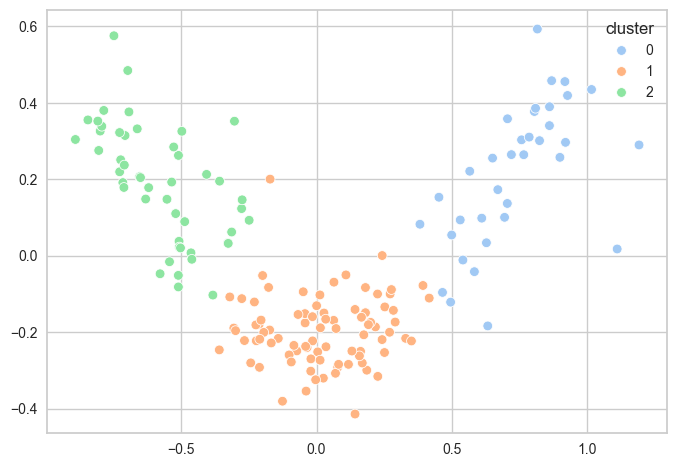

In [37]:
pca_2d = PCA(n_components=2)
pca_2d.fit(X_scaled)

X_scaled_pca_2d = pca_2d.fit_transform(X_scaled)

#scatter PC1 & PC2
sns.scatterplot(x=X_scaled_pca_2d[:,0], y=X_scaled_pca_2d[:,1], hue=df_kmeans['cluster'], palette='pastel')

Sudah cocok k-means

### Distribusi antara banyaknya child_mortality dan total_fertility

In [38]:
df_kmeans['cluster'].value_counts()

cluster
1    84
2    48
0    35
Name: count, dtype: int64

Banyak variasi

<Axes: xlabel='child_mortality', ylabel='total_fertility'>

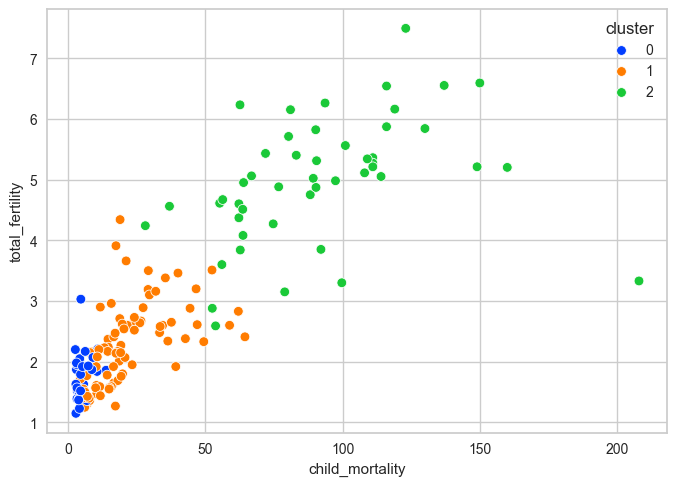

In [39]:
sns.scatterplot(data=df_kmeans, x="child_mortality", y="total_fertility", hue="cluster",palette="bright")

### Distribusi antara banyakny exports dan imports

<Axes: xlabel='exports', ylabel='imports'>

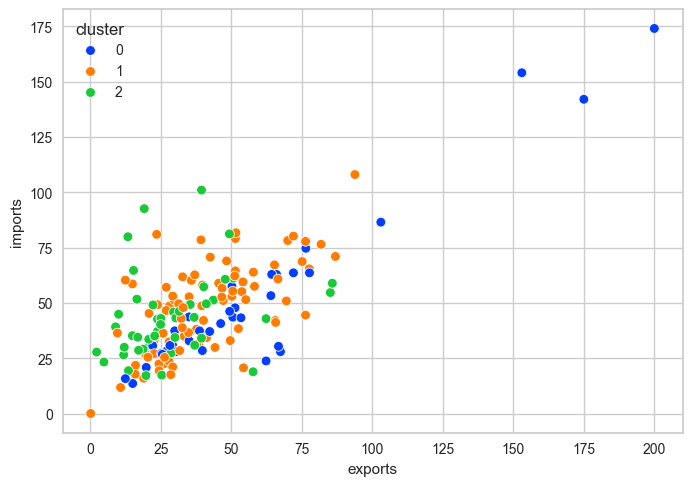

In [40]:
sns.scatterplot(data=df_kmeans, x="exports", y="imports", hue="cluster",palette="bright")

### Distribusi antara banyaknya gdpp dan income

<Axes: xlabel='gdpp', ylabel='income'>

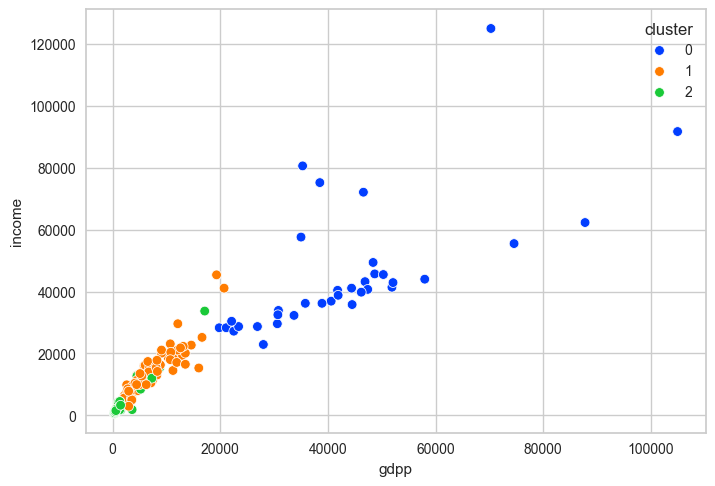

In [41]:
sns.scatterplot(data=df_kmeans, x="gdpp", y="income", hue="cluster",palette="bright")

### Distribusi antara banyaknya inflation dan income

<Axes: xlabel='income', ylabel='inflation'>

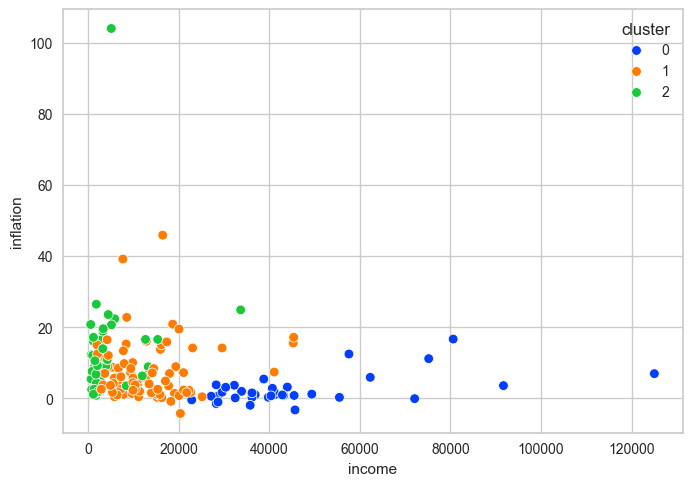

In [42]:
sns.scatterplot(data=df_kmeans, x="income", y="inflation", hue="cluster",palette="bright")

simpulan eda, kasih ciri cluster 1, 2, 3 dan beri label

cluster 2 diprioritaskan:
- child mortality tinggi, income dan gdpp rendah, export imports rendah

tampilkan negara2

tingkat prioritas: 2 > 1 > 0

# **XII. Model Saving**

In [43]:
num_cols = num_cols.tolist()

In [44]:
#Save Files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

with open('kmeans.pkl', 'wb') as file_4:
  pickle.dump(km, file_4)